In [25]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
cd /content/gdrive/MyDrive/SEGMENTATION/

/content/gdrive/MyDrive/SEGMENTATION


In [27]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-k3ncpy2g
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-k3ncpy2g
  Running command git submodule update --init --recursive -q


In [28]:
# Importing Data From COCO

from pycocotools import coco, cocoeval, _mask
from pycocotools import mask as maskUtils 
import array
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline


In [29]:
CATEGORY_NAMES=['agfields_singleclass']

ANNOTATION_FILE_VAL = '/content/gdrive/MyDrive/SEGMENTATION/256*256/annotations/val2016.json'
ANNOTATION_FILE_TRAIN = '/content/gdrive/MyDrive/SEGMENTATION/256*256/annotations/train2016.json'


In [30]:
coco_train = coco.COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=CATEGORY_NAMES);
imgIds_train = coco_train.getImgIds(catIds=catIds_train);
imgDict_train = coco_train.loadImgs(imgIds_train)
len(imgIds_train) , len(catIds_train)

loading annotations into memory...
Done (t=1.90s)
creating index...
index created!


(2236, 1)

In [31]:
coco_val = coco.COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=CATEGORY_NAMES);
imgIds_val = coco_val.getImgIds(catIds=catIds_val);
imgDict_val = coco_val.loadImgs(imgIds_val)
len(imgIds_val) , len(catIds_val)

loading annotations into memory...
Done (t=1.11s)
creating index...
index created!


(559, 1)

In [32]:
from random import shuffle


shuffle(imgIds_train)
shuffle(imgIds_val)

imgIds_train = imgIds_train[0:6000]
imgIds_val = imgIds_val[0:600]


In [33]:
train_images_field = ["COCO_train2016_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_field = ["COCO_val2016_{0:012d}.jpg".format(ids) for ids in imgIds_val]

In [34]:
print(len(train_images_field) , len(val_images_field))

2236 559


In [35]:
train_images_field = ["COCO_train2016_{0:012d}.jpg".format(ids) for ids in imgIds_train]
print(train_images_field)
del_img_train = set(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016")) - set(train_images_field)
for file_name in del_img_train:
  file_name = "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016/" + file_name
  if os.path.exists(file_name):
    os.remove(file_name)

len(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016"))

['COCO_train2016_000000100790.jpg', 'COCO_train2016_000000101800.jpg', 'COCO_train2016_000000101644.jpg', 'COCO_train2016_000000101896.jpg', 'COCO_train2016_000000100728.jpg', 'COCO_train2016_000000101561.jpg', 'COCO_train2016_000000100158.jpg', 'COCO_train2016_000000101705.jpg', 'COCO_train2016_000000103214.jpg', 'COCO_train2016_000000101601.jpg', 'COCO_train2016_000000100808.jpg', 'COCO_train2016_000000100823.jpg', 'COCO_train2016_000000102737.jpg', 'COCO_train2016_000000101017.jpg', 'COCO_train2016_000000100327.jpg', 'COCO_train2016_000000101129.jpg', 'COCO_train2016_000000101156.jpg', 'COCO_train2016_000000101028.jpg', 'COCO_train2016_000000101763.jpg', 'COCO_train2016_000000102162.jpg', 'COCO_train2016_000000100122.jpg', 'COCO_train2016_000000101718.jpg', 'COCO_train2016_000000100095.jpg', 'COCO_train2016_000000101845.jpg', 'COCO_train2016_000000102855.jpg', 'COCO_train2016_000000101677.jpg', 'COCO_train2016_000000101799.jpg', 'COCO_train2016_000000100237.jpg', 'COCO_train2016_000

2236

In [36]:
val_images_field = ["COCO_val2016_{0:012d}.jpg".format(ids) for ids in imgIds_val]
print(val_images_field)
del_img_val = set(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016")) - set(val_images_field)
for file_name in del_img_val:
  file_name = "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016/" + file_name
  if os.path.exists(file_name):
    os.remove(file_name)

len(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016"))

['COCO_val2016_000000102289.jpg', 'COCO_val2016_000000102972.jpg', 'COCO_val2016_000000101384.jpg', 'COCO_val2016_000000100984.jpg', 'COCO_val2016_000000103066.jpg', 'COCO_val2016_000000102284.jpg', 'COCO_val2016_000000102983.jpg', 'COCO_val2016_000000102198.jpg', 'COCO_val2016_000000101162.jpg', 'COCO_val2016_000000100712.jpg', 'COCO_val2016_000000101578.jpg', 'COCO_val2016_000000100673.jpg', 'COCO_val2016_000000102446.jpg', 'COCO_val2016_000000102609.jpg', 'COCO_val2016_000000102741.jpg', 'COCO_val2016_000000101959.jpg', 'COCO_val2016_000000102057.jpg', 'COCO_val2016_000000103220.jpg', 'COCO_val2016_000000100154.jpg', 'COCO_val2016_000000100458.jpg', 'COCO_val2016_000000101933.jpg', 'COCO_val2016_000000101579.jpg', 'COCO_val2016_000000101665.jpg', 'COCO_val2016_000000102118.jpg', 'COCO_val2016_000000102340.jpg', 'COCO_val2016_000000101511.jpg', 'COCO_val2016_000000101595.jpg', 'COCO_val2016_000000102607.jpg', 'COCO_val2016_000000101582.jpg', 'COCO_val2016_000000101824.jpg', 'COCO_val

559

In [37]:
from PIL import Image


In [38]:
"""count = 0 

for ID in imgIds_train:

  file_path = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_train2016/COCO_train2016_{0:012d}.jpg".format(ID)
  
  sampleImgIds = coco_train.getImgIds(imgIds = [ID])
  sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]

  annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
  anns = coco_train.loadAnns(annIds)


  mask = coco_train.annToMask(anns[0])
  for i in range(len(anns)):
      mask = mask | coco_train.annToMask(anns[i])
  
  mask = Image.fromarray(mask * 255 , mode = "L")
  mask.save(file_path)
  count = count + 1
  print(count)"""

'count = 0 \n\nfor ID in imgIds_train:\n\n  file_path = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_train2016/COCO_train2016_{0:012d}.jpg".format(ID)\n  \n  sampleImgIds = coco_train.getImgIds(imgIds = [ID])\n  sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]\n\n  annIds = coco_train.getAnnIds(imgIds=sampleImgDict[\'id\'], catIds=catIds_train, iscrowd=0)\n  anns = coco_train.loadAnns(annIds)\n\n\n  mask = coco_train.annToMask(anns[0])\n  for i in range(len(anns)):\n      mask = mask | coco_train.annToMask(anns[i])\n  \n  mask = Image.fromarray(mask * 255 , mode = "L")\n  mask.save(file_path)\n  count = count + 1\n  print(count)'

In [39]:
"""count = 0 
for ID in imgIds_val:

  file_path = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_val2016/COCO_val2016_{0:012d}.jpg".format(ID)
  
  sampleImgIds = coco_val.getImgIds(imgIds = [ID])
  sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]

  annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
  anns = coco_val.loadAnns(annIds)


  mask = coco_val.annToMask(anns[0])
  for i in range(len(anns)):
      mask = mask | coco_val.annToMask(anns[i])
  
  mask = Image.fromarray(mask * 255 , mode = "L")
  mask.save(file_path)
  
  count = count + 1
  print(count)"""

'count = 0 \nfor ID in imgIds_val:\n\n  file_path = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_val2016/COCO_val2016_{0:012d}.jpg".format(ID)\n  \n  sampleImgIds = coco_val.getImgIds(imgIds = [ID])\n  sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]\n\n  annIds = coco_val.getAnnIds(imgIds=sampleImgDict[\'id\'], catIds=catIds_val, iscrowd=0)\n  anns = coco_val.loadAnns(annIds)\n\n\n  mask = coco_val.annToMask(anns[0])\n  for i in range(len(anns)):\n      mask = mask | coco_val.annToMask(anns[i])\n  \n  mask = Image.fromarray(mask * 255 , mode = "L")\n  mask.save(file_path)\n  \n  count = count + 1\n  print(count)'

# Data Generator

In [40]:
import os
import sys
import random

import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

seed = 2019

random.seed = seed
np.random.seed = seed 

In [41]:
class DataGen(tf.keras.utils.Sequence):
  
  def __init__(self , path_input , path_mask , batch_size = 16 , image_size = 256):
    
    self.ids = os.listdir(path_input)
    self.path_input = path_input
    self.path_mask = path_mask
    self.batch_size = batch_size
    self.image_size = image_size
    self.on_epoch_end()
  
  def __load__(self , id_name):
    
    image_path = os.path.join(self.path_input , id_name)
    mask_path = os.path.join(self.path_mask , id_name) 
    
    image = cv2.imread(image_path , 1) # 1 specifies RGB format
    image = cv2.resize(image , (self.image_size , self.image_size)) # resizing before inserting to the network
    
    mask = cv2.imread(mask_path , -1)
    mask = cv2.resize(mask , (self.image_size , self.image_size))
    mask = mask.reshape((self.image_size , self.image_size , 1))
      
    #normalize image
    image = image / 255.0
    mask = mask / 255.0
    
    return image , mask
  
  def __getitem__(self , index):
    
    if (index + 1)*self.batch_size > len(self.ids):
      self.batch_size = len(self.ids) - index * self.batch_size
        
    file_batch = self.ids[index * self.batch_size : (index + 1) * self.batch_size]
    
    images = []
    masks = []
    
    for id_name in file_batch : 
      
      _img , _mask = self.__load__(id_name)
      images.append(_img)
      masks.append(_mask)
    
    
    images = np.array(images)
    masks = np.array(masks)
    
    
    return images , masks
  
  
  def on_epoch_end(self):
    pass
  
  
  def __len__(self):
    
    return int(np.ceil(len(self.ids) / float(self.batch_size)))

In [42]:
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

**U-Net with ResNet34 Encoder**

In [43]:
%env SM_FRAMEWORK=tf.keras
from segmentation_models import Unet,PSPNet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'seresnet101'
preprocess_input = get_preprocessing(BACKBONE)
model = Unet(BACKBONE, encoder_weights='imagenet', classes=1)
model.summary()

env: SM_FRAMEWORK=tf.keras
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_35 (ZeroPadding  (None, None, None,   0          ['input[0][0]']                  
 2D)                            3)                                                                
                                                                                                  
 conv2d_170 (Conv2D)            (None, None, None,   9408        ['zero_padding2d_35[0][0]']      
                                64)                              

In [44]:
image_size = 256 
epochs = 50
batch_size = 16


In [45]:
import segmentation_models as sm

model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"]
)

In [46]:
filepath = "/content/gdrive/MyDrive/SEGMENTATION/checkpoint/EFFNET_B7_UNET_model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1)

callbacks_list = [earlystopper, checkpoint, reduce_lr]

In [47]:
train_gen = DataGen(path_input = "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016" , path_mask = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_train2016" , batch_size = batch_size , image_size = image_size)
val_gen = DataGen(path_input =  "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016", path_mask =  "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_val2016", batch_size = batch_size , image_size = image_size)


train_steps =  len(os.listdir( "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016"))/batch_size


model.fit_generator(train_gen , validation_data = val_gen , steps_per_epoch = train_steps , epochs=epochs, verbose = True,  callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
140/139 [==============================] - ETA: 0s - loss: 0.7591 - iou_score: 0.6364 - accuracy: 0.6935
Epoch 1: val_loss improved from inf to 99.87057, saving model to /content/gdrive/MyDrive/SEGMENTATION/checkpoint/EFFNET_B7_UNET_model.h5
139/139 [==============================] - 69s 379ms/step - loss: 0.7591 - iou_score: 0.6364 - accuracy: 0.6935 - val_loss: 99.8706 - val_iou_score: 0.1586 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/50
140/139 [==============================] - ETA: 0s - loss: 0.6528 - iou_score: 0.6838 - accuracy: 0.7180
Epoch 2: val_loss improved from 99.87057 to 44.36856, saving model to /content/gdrive/MyDrive/SEGMENTATION/checkpoint/EFFNET_B7_UNET_model.h5
139/139 [==============================] - 48s 343ms/step - loss: 0.6528 - iou_score: 0.6838 - accuracy: 0.7180 - val_loss: 44.3686 - val_iou_score: 0.5211 - val_accuracy: 0.4557 - lr: 0.0010
Epoch 3/50
140/139 [==============================] - ETA: 0s - loss: 0.7276 - iou_score: 0.6587 - accura

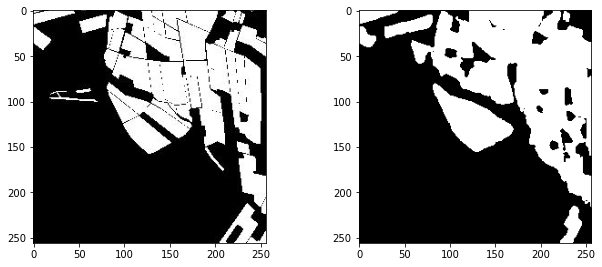

In [48]:
x, y = val_gen.__getitem__(6)
result = model.predict(x)

result = result > 0.5



fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

**Watershed Algorithm**

In [50]:
"""This code performs segmentation of 256x256 images followed by watershed
based separation of objects. Object properties will also be calculated.
"""

from keras.utils.np_utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage import measure, color, io


IMG_HEIGHT = 256
IMG_WIDTH  = 256
IMG_CHANNELS = 1

In [51]:
model.load_weights('/content/gdrive/MyDrive/SEGMENTATION/checkpoint/EFFNET_B7_UNET_model.h5') #Trained for 50 epochs

In [52]:
#Load and process the test image - image that needs to be segmented. 
test_img = cv2.imread('/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016/COCO_val2016_000000100000.jpg', 0)
test_img_norm = np.expand_dims(normalize(np.array(test_img), axis=1),2)
test_img_norm=test_img_norm[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)

In [ ]:
#Predict and threshold for values above 0.5 probability
segmented = (model.predict(test_img_input)[0,:,:,0] > 0.05).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(222)
plt.title('Segmented Image')
plt.imshow(segmented, cmap='gray')
plt.show()

plt.imsave('data/results/output.jpg', segmented, cmap='gray')


ValueError: ignored

In [ ]:
########################################################
#####Watershed

img = cv2.imread('data/results/output.jpg')  #Read as color (3 channels)
img_grey = img[:,:,0]

In [ ]:
## transform the unet result to binary image
#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [ ]:
#from skimage.segmentation import clear_border
#opening = clear_border(opening) #Remove edge touching grains. 
#Check the total regions found before and after applying this. 

In [ ]:
# let us start by identifying sure background area
# dilating pixes a few times increases field boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us. 
sure_bg = cv2.dilate(opening,kernel,iterations=10)

In [ ]:
# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

In [ ]:
#Let us threshold the dist transform by starting at 1/2 its max value.
ret2, sure_fg = cv2.threshold(dist_transform, 0.2*dist_transform.max(),255,0)

#Later you may realize that 0.2*max value may be better. Also try other values. 
#High value like 0.7 will drop some small fields. 


In [ ]:
# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
#Now we create a marker and label the regions inside. 
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0. 
#For markers let us use ConnectedComponents. 
ret3, markers = cv2.connectedComponents(sure_fg)

In [ ]:
#One problem rightnow is that the entire background pixels is given value 0.
#This means watershed considers this region as unknown.
#So let us add 10 to all labels so that sure background is not 0, but 10
markers = markers+10

In [ ]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers, cmap='gray')   #Look at the 3 distinct regions.

In [ ]:
#Now we are ready for watershed filling. 
markers = cv2.watershed(img, markers)
#plt.imshow(markers, cmap='gray')
#The boundary region will be marked -1

In [ ]:
#Let us color boundaries in yellow. 
img[markers == -1] = [0,255,255]  

img2 = color.label2rgb(markers, bg_label=0)

cv2.imshow('Overlay on original image', img)
cv2.imshow('Colored Grains', img2)
cv2.waitKey(0)